# We can convert the 6d to 7D to be more similar to Lockwood et al. 2022

In [79]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [80]:
import os
ex_path = "/Users/simon/new-orleans/data/kate_h08"
os.listdir(ex_path)

['minpr.63.nc',
 'fort.224.nc',
 'maxwvel.63.nc',
 'windDrag.173.nc',
 'fort.221.nc',
 'fort.73.nc',
 'fort.63.nc',
 'fort.22',
 'fort.14',
 'maxvel.63.nc',
 'fort.15',
 'fort.218',
 'fort.221',
 'fort.217',
 'fort.218.nc',
 'adcirc_log.txt',
 'maxele.63.nc',
 'fort.33',
 'fort.74.nc',
 'fort.64.nc',
 'fort.16',
 'fort.222.nc',
 'fort.217.nc',
 'fort.223.nc',
 'fort.224',
 'fort.223',
 'big_ds.nc',
 'traj.nc',
 'fort.222']

In [81]:
file_names = ['fort.73.nc', 'fort.74.nc', 'fort.63.nc', 'fort.64.nc']
variables = [('pressure',), ('windx', 'windy'), ('zeta',), ('u-vel', 'v-vel')]

In [82]:
import netCDF4 as nc

In [83]:
for i in range(len(file_names)):
    print([x for x in nc.Dataset(os.path.join(ex_path, file_names[i])).variables])

['time', 'x', 'y', 'element', 'adcirc_mesh', 'neta', 'nvdll', 'max_nvdll', 'ibtypee', 'nbdv', 'nvel', 'nvell', 'max_nvell', 'ibtype', 'nbvv', 'depth', 'pressure']
['time', 'x', 'y', 'element', 'adcirc_mesh', 'neta', 'nvdll', 'max_nvdll', 'ibtypee', 'nbdv', 'nvel', 'nvell', 'max_nvell', 'ibtype', 'nbvv', 'depth', 'windx', 'windy']
['time', 'x', 'y', 'element', 'adcirc_mesh', 'neta', 'nvdll', 'max_nvdll', 'ibtypee', 'nbdv', 'nvel', 'nvell', 'max_nvell', 'ibtype', 'nbvv', 'depth', 'zeta']
['time', 'x', 'y', 'element', 'adcirc_mesh', 'neta', 'nvdll', 'max_nvdll', 'ibtypee', 'nbdv', 'nvel', 'nvell', 'max_nvell', 'ibtype', 'nbvv', 'depth', 'u-vel', 'v-vel']


In [84]:
for i in range(len(file_names)):
    for variable in variables[i]:
        print(variable)
        print(nc.Dataset(os.path.join(ex_path, file_names[i]))[variable].long_name)

pressure
air pressure at sea level
windx
e/w wind velocity
windy
n/s wind velocity
zeta
water surface elevation above geoid
u-vel
water column vertically averaged east/west velocity
v-vel
water column vertically averaged north/south velocity


In [85]:
ds = nc.Dataset(os.path.join(ex_path, file_names[0]))

In [86]:
ds["pressure"].long_name

'air pressure at sea level'

In [87]:
ds["time"].long_name

'model time'

In [88]:
ds["time"].units

'seconds since 2020-04-28 00:00:00'

In [89]:
ds["time"][:]

masked_array(data=[   4800.,    9600.,   14400.,   19200.,   24000.,
                     28800.,   33600.,   38400.,   43200.,   48000.,
                     52800.,   57600.,   62400.,   67200.,   72000.,
                     76800.,   81600.,   86400.,   91200.,   96000.,
                    100800.,  105600.,  110400.,  115200.,  120000.,
                    124800.,  129600.,  134400.,  139200.,  144000.,
                    148800.,  153600.,  158400.,  163200.,  168000.,
                    172800.,  177600.,  182400.,  187200.,  192000.,
                    196800.,  201600.,  206400.,  211200.,  216000.,
                    220800.,  225600.,  230400.,  235200.,  240000.,
                    244800.,  249600.,  254400.,  259200.,  264000.,
                    268800.,  273600.,  278400.,  283200.,  288000.,
                    292800.,  297600.,  302400.,  307200.,  312000.,
                    316800.,  321600.,  326400.,  331200.,  336000.,
                    340800.,  3456

## Add all this weird nc data into a single xarray dataset.

In [90]:
import xarray as xr

In [91]:
traj_ds = xr.open_dataset(os.path.join(ex_path, "traj.nc"))

In [92]:
traj_ds

<xarray.Dataset>
Dimensions:  (time: 56)
Coordinates:
  * time     (time) datetime64[ns] 2005-08-25 ... 2005-08-31T21:00:00
Data variables:
    lon      (time) float64 ...
    lat      (time) float64 ...

### Mess around with ADCIRC mesh

ds["adcirc_mesh"]

In [93]:
# triangular mesh elements stored in "element" variable
ds["element"][:]

masked_array(
  data=[[5189, 5434, 5190],
        [7845, 7777, 7844],
        [4551, 4806, 4807],
        ...,
        [ 997, 1079, 1078],
        [ 996, 1078, 1077],
        [1079, 1168, 1078]],
  mask=False,
  fill_value=999999,
  dtype=int32)

In [94]:
ds["element"][:].shape

(14761, 3)

Dimension: element, vertex, Units: mesh component [dimensionless]

In [95]:
xr.DataArray(ds["element"][:], dims=["element", "vertex"])

<xarray.DataArray (element: 14761, vertex: 3)>
array([[5189, 5434, 5190],
       [7845, 7777, 7844],
       [4551, 4806, 4807],
       ...,
       [ 997, 1079, 1078],
       [ 996, 1078, 1077],
       [1079, 1168, 1078]], dtype=int32)
Dimensions without coordinates: element, vertex

In [96]:
ds["depth"][:]  # depth at nodes

masked_array(data=[1., 1., 1., ..., 1., 1., 1.],
             mask=False,
       fill_value=1e+20)

In [97]:
ds["depth"][:].max(), ds["depth"][:].min() # can only get down to 1 meter of depth

(7987.0644531, 1.0)

In [98]:
ds["depth"][:].shape

(8303,)

In [99]:
xr.DataArray(ds["depth"][:], dims=["node"])

<xarray.DataArray (node: 8303)>
array([1., 1., 1., ..., 1., 1., 1.])
Dimensions without coordinates: node

### Let's look at the main variables

In [100]:
ds["pressure"][:].shape  # pressure at nodes

(252, 8303)

In [101]:
xr.Dataset(data_vars=dict(pressure=(["time", "node"], ds["pressure"][:])))

<xarray.Dataset>
Dimensions:   (time: 252, node: 8303)
Dimensions without coordinates: time, node
Data variables:
    pressure  (time, node) float64 10.33 10.33 10.33 10.33 ... 10.33 10.33 10.33

In [102]:
ds_list = []
for i in range(len(file_names)):
    for variable in variables[i]:
        print(variable)
        ds_list.append(xr.Dataset(data_vars={
        variable: (["time", "node"], nc.Dataset(os.path.join(ex_path, file_names[i]))[variable][:]),
        }))

pressure
windx
windy
zeta
u-vel
v-vel


In [103]:
ds_list[0]

<xarray.Dataset>
Dimensions:   (time: 252, node: 8303)
Dimensions without coordinates: time, node
Data variables:
    pressure  (time, node) float64 10.33 10.33 10.33 10.33 ... 10.33 10.33 10.33

In [104]:
merge_ds = xr.merge(ds_list)

In [105]:
merge_ds

<xarray.Dataset>
Dimensions:   (time: 252, node: 8303)
Dimensions without coordinates: time, node
Data variables:
    pressure  (time, node) float64 10.33 10.33 10.33 10.33 ... 10.33 10.33 10.33
    windx     (time, node) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    windy     (time, node) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    zeta      (time, node) float64 3.793e-06 2.164e-05 ... -0.2057 -0.136
    u-vel     (time, node) float64 2.479e-05 2.382e-05 ... 0.06647 -0.001961
    v-vel     (time, node) float64 5.628e-06 1.081e-05 ... -0.01729 -0.00115

### How to convert from model time to datetime?

ds

In [106]:
traj_ds

<xarray.Dataset>
Dimensions:  (time: 56)
Coordinates:
  * time     (time) datetime64[ns] 2005-08-25 ... 2005-08-31T21:00:00
Data variables:
    lon      (time) float64 -88.97 -88.97 -88.97 -88.97 ... -88.97 -88.97 -88.97
    lat      (time) float64 2.945 3.695 4.446 5.196 ... 41.95 42.7 43.45 44.2

In [107]:
merge_ds["pressure"].shape

(252, 8303)

In [108]:
252/14

18.0

In [109]:
traj_ds

<xarray.Dataset>
Dimensions:  (time: 56)
Coordinates:
  * time     (time) datetime64[ns] 2005-08-25 ... 2005-08-31T21:00:00
Data variables:
    lon      (time) float64 -88.97 -88.97 -88.97 -88.97 ... -88.97 -88.97 -88.97
    lat      (time) float64 2.945 3.695 4.446 5.196 ... 41.95 42.7 43.45 44.2

In [110]:
31 - 25

6

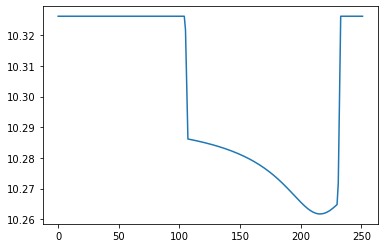

In [111]:
import matplotlib.pyplot as plt

plt.plot(merge_ds["pressure"].values[:, 25])

In [112]:
merge_ds["pressure"].values.shape

(252, 8303)

Text(0.5, 0, 'Time')

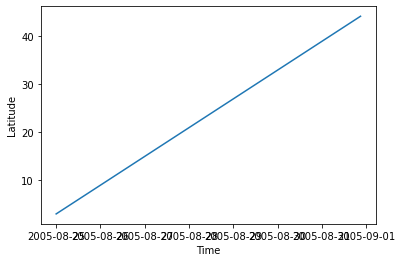

In [113]:
plt.plot(traj_ds["time"].values, traj_ds["lat"].values)
plt.ylabel("Latitude")
plt.xlabel("Time")

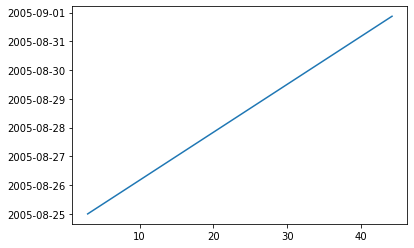

In [114]:
plt.plot(traj_ds["lat"].values, traj_ds["time"].values)


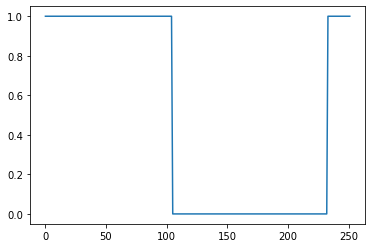

In [115]:
import numpy as np

bool_array = merge_ds["pressure"].values[:,3000] > 10.32619776 - 0.0001

plt.plot(bool_array)
change_array = np.diff(bool_array.astype(int))

In [116]:
np.where(change_array != 0)

(array([104, 232]),)

In [117]:
bool_array[105:233]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False]

In [118]:
bool_array[105:233].shape

(128,)

In [119]:
traj_ds["time"].values.shape

(56,)

In [120]:
128 / 56

2.2857142857142856

In [121]:
traj_ds["time"].values

array(['2005-08-25T00:00:00.000000000', '2005-08-25T03:00:00.000000000',
       '2005-08-25T06:00:00.000000000', '2005-08-25T09:00:00.000000000',
       '2005-08-25T12:00:00.000000000', '2005-08-25T15:00:00.000000000',
       '2005-08-25T18:00:00.000000000', '2005-08-25T21:00:00.000000000',
       '2005-08-26T00:00:00.000000000', '2005-08-26T03:00:00.000000000',
       '2005-08-26T06:00:00.000000000', '2005-08-26T09:00:00.000000000',
       '2005-08-26T12:00:00.000000000', '2005-08-26T15:00:00.000000000',
       '2005-08-26T18:00:00.000000000', '2005-08-26T21:00:00.000000000',
       '2005-08-27T00:00:00.000000000', '2005-08-27T03:00:00.000000000',
       '2005-08-27T06:00:00.000000000', '2005-08-27T09:00:00.000000000',
       '2005-08-27T12:00:00.000000000', '2005-08-27T15:00:00.000000000',
       '2005-08-27T18:00:00.000000000', '2005-08-27T21:00:00.000000000',
       '2005-08-28T00:00:00.000000000', '2005-08-28T03:00:00.000000000',
       '2005-08-28T06:00:00.000000000', '2005-08-28

In [122]:
merge_ds["pressure"].values

array([[10.32619776, 10.32619776, 10.32619776, ..., 10.32619776,
        10.32619776, 10.32619776],
       [10.32619776, 10.32619776, 10.32619776, ..., 10.32619776,
        10.32619776, 10.32619776],
       [10.32619776, 10.32619776, 10.32619776, ..., 10.32619776,
        10.32619776, 10.32619776],
       ...,
       [10.32619776, 10.32619776, 10.32619776, ..., 10.32619776,
        10.32619776, 10.32619776],
       [10.32619776, 10.32619776, 10.32619776, ..., 10.32619776,
        10.32619776, 10.32619776],
       [10.32619776, 10.32619776, 10.32619776, ..., 10.32619776,
        10.32619776, 10.32619776]])

### summary of time differences
So the time for the input seems to be every three hours for 56 timesteps -- for 7 days of total time.
For the output this seems to correspond to [104, 232] - so 128 or so timesteps (possibly off by one error) so seems to be an 80 minute timestep - 1:20.

In [123]:
56*3 / 24

7.0

In [124]:
232-104

128

In [125]:
128/7

18.285714285714285

In [126]:
nc.Dataset(os.path.join(ex_path, file_names[0]))["time"].units

'seconds since 2020-04-28 00:00:00'

In [127]:
np.diff(nc.Dataset(os.path.join(ex_path, file_names[0]))["time"][:])

masked_array(data=[4800., 4800., 4800., 4800., 4800., 4800., 4800., 4800.,
                   4800., 4800., 4800., 4800., 4800., 4800., 4800., 4800.,
                   4800., 4800., 4800., 4800., 4800., 4800., 4800., 4800.,
                   4800., 4800., 4800., 4800., 4800., 4800., 4800., 4800.,
                   4800., 4800., 4800., 4800., 4800., 4800., 4800., 4800.,
                   4800., 4800., 4800., 4800., 4800., 4800., 4800., 4800.,
                   4800., 4800., 4800., 4800., 4800., 4800., 4800., 4800.,
                   4800., 4800., 4800., 4800., 4800., 4800., 4800., 4800.,
                   4800., 4800., 4800., 4800., 4800., 4800., 4800., 4800.,
                   4800., 4800., 4800., 4800., 4800., 4800., 4800., 4800.,
                   4800., 4800., 4800., 4800., 4800., 4800., 4800., 4800.,
                   4800., 4800., 4800., 4800., 4800., 4800., 4800., 4800.,
                   4800., 4800., 4800., 4800., 4800., 4800., 4800., 4800.,
                   4800.,

In [128]:
4800 / 60 

80.0

In [129]:
from datetime import datetime, timedelta
seconds_array = nc.Dataset(os.path.join(ex_path, file_names[0]))["time"][:]
start_input = traj_ds["time"].values[0]
start_input_date = datetime.utcfromtimestamp(
            (start_input - np.datetime64("1970-01-01T00:00:00")) / np.timedelta64(1, "s")
        )
time_array = [start_input_date + timedelta(minutes= seconds_array[i]/60 - 105 * 80) for i in range(len(seconds_array))]

In [130]:
merge_ds.assign_coords(time=time_array)

<xarray.Dataset>
Dimensions:   (time: 252, node: 8303)
Coordinates:
  * time      (time) datetime64[ns] 2005-08-19T05:20:00 ... 2005-09-02T04:00:00
Dimensions without coordinates: node
Data variables:
    pressure  (time, node) float64 10.33 10.33 10.33 10.33 ... 10.33 10.33 10.33
    windx     (time, node) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    windy     (time, node) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    zeta      (time, node) float64 3.793e-06 2.164e-05 ... -0.2057 -0.136
    u-vel     (time, node) float64 2.479e-05 2.382e-05 ... 0.06647 -0.001961
    v-vel     (time, node) float64 5.628e-06 1.081e-05 ... -0.01729 -0.00115

In [131]:
start_input = traj_ds["time"].values[0]

In [132]:
xr.merge([traj_ds.rename({"time": "input_time"}), merge_ds.rename({"time": "output_time"})])

<xarray.Dataset>
Dimensions:     (input_time: 56, output_time: 252, node: 8303)
Coordinates:
  * input_time  (input_time) datetime64[ns] 2005-08-25 ... 2005-08-31T21:00:00
Dimensions without coordinates: output_time, node
Data variables:
    lon         (input_time) float64 -88.97 -88.97 -88.97 ... -88.97 -88.97
    lat         (input_time) float64 2.945 3.695 4.446 5.196 ... 42.7 43.45 44.2
    pressure    (output_time, node) float64 10.33 10.33 10.33 ... 10.33 10.33
    windx       (output_time, node) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    windy       (output_time, node) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    zeta        (output_time, node) float64 3.793e-06 2.164e-05 ... -0.136
    u-vel       (output_time, node) float64 2.479e-05 2.382e-05 ... -0.001961
    v-vel       (output_time, node) float64 5.628e-06 1.081e-05 ... -0.00115

In [133]:
start_input

numpy.datetime64('2005-08-25T00:00:00.000000000')

In [134]:
date = datetime.utcfromtimestamp(
            (start_input - np.datetime64("1970-01-01T00:00:00")) / np.timedelta64(1, "s")
        )

In [135]:
date

datetime.datetime(2005, 8, 25, 0, 0)

In [136]:
dir(start_input)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_interface__',
 '__array_priority__',
 '__array_struct__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__le__',
 '__lshift__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rlshift__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__rpow__',
 '__rrshift__',
 '__rshift__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__xor__',
 'all',
 'any',
 'argmax',
 'argmin',
 'argsort',
 'ast

### Depth and Mesh dataset

In [137]:
depth_array = nc.Dataset(os.path.join(ex_path, file_names[0]))["depth"][:]
element_array = nc.Dataset(os.path.join(ex_path, file_names[0]))["element"][:]

In [138]:
mesh_ds = xr.Dataset(data_vars=dict(depth=(["node"], depth_array), triangle=(["element", "vertex"], element_array)))

In [139]:
xr.DataArray(ds["element"][:], dims=["element", "vertex"])

<xarray.DataArray (element: 14761, vertex: 3)>
array([[5189, 5434, 5190],
       [7845, 7777, 7844],
       [4551, 4806, 4807],
       ...,
       [ 997, 1079, 1078],
       [ 996, 1078, 1077],
       [1079, 1168, 1078]], dtype=int32)
Dimensions without coordinates: element, vertex

In [140]:
ds["ibtype"].long_name

'type of normal flow (discharge) boundary'

In [141]:
ds["ibtype"].shape

(44,)

### Get Max values

In [142]:
file_names=["maxele.63.nc", 'maxwvel.63.nc', "maxvel.63.nc"]
variables=[("zeta_max", "time_of_zeta_max"), ("wind_max", "time_of_wind_max"), ("vel_max","time_of_vel_max")]
new_ds_list = []
for i in range(len(file_names)):
    for variable in variables[i]:
        new_ds_list.append(xr.Dataset(data_vars={
        variable: (["node"], nc.Dataset(os.path.join(ex_path, file_names[i]))[variable][:]),
        }))
max_ds = xr.merge(new_ds_list)

In [143]:
nc.Dataset(os.path.join(ex_path, "maxvel.63.nc"))

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    _FillValue: -99999.0
    model: ADCIRC
    version: 454104d
    grid_type: Triangular
    description: OceanMesh2D
    agrid: OceanMesh2D
    rundes: OceanMesh2D
    runid: Run_001
    title: OceanMesh2D
    institution: Notre Dame CHL
    source: OceanMesh2D
    history: History: None
    references: https://github.com/CHLNDDEV/OceanMesh2D/
    comments: Comments: None
    host: Host: Name
    convention: Metric, MSL
    Conventions: UGRID-0.9.0
    contact: name@instit.edu
    creation_date: 2023-02-07 22:14:14  00:00
    modification_date: 2023-02-07 22:14:14  00:00
    fort.15: ==== Input File Parameters (below) ====
    dt: 20.0
    ihot: 0
    ics: 2
    nolibf: 1
    nolifa: 2
    nolica: 1
    nolicat: 1
    nwp: 0
    ncor: 1
    ntip: 1
    nws: 12
    nramp: 1
    tau0: -1.0
    statim: 0.0
    reftim: 0.0
    rnday: 14.0
    dramp: 2.0
    a00: 0.0
    b00: 1.0
    c00: 0.0
   

In [144]:
nc.Dataset(os.path.join(ex_path, "maxele.63.nc"))

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    _FillValue: -99999.0
    model: ADCIRC
    version: 454104d
    grid_type: Triangular
    description: OceanMesh2D
    agrid: OceanMesh2D
    rundes: OceanMesh2D
    runid: Run_001
    title: OceanMesh2D
    institution: Notre Dame CHL
    source: OceanMesh2D
    history: History: None
    references: https://github.com/CHLNDDEV/OceanMesh2D/
    comments: Comments: None
    host: Host: Name
    convention: Metric, MSL
    Conventions: UGRID-0.9.0
    contact: name@instit.edu
    creation_date: 2023-02-07 22:14:13  00:00
    modification_date: 2023-02-07 22:14:13  00:00
    fort.15: ==== Input File Parameters (below) ====
    dt: 20.0
    ihot: 0
    ics: 2
    nolibf: 1
    nolifa: 2
    nolica: 1
    nolicat: 1
    nwp: 0
    ncor: 1
    ntip: 1
    nws: 12
    nramp: 1
    tau0: -1.0
    statim: 0.0
    reftim: 0.0
    rnday: 14.0
    dramp: 2.0
    a00: 0.0
    b00: 1.0
    c00: 0.0
   

In [145]:
os.listdir(ex_path)

['minpr.63.nc',
 'fort.224.nc',
 'maxwvel.63.nc',
 'windDrag.173.nc',
 'fort.221.nc',
 'fort.73.nc',
 'fort.63.nc',
 'fort.22',
 'fort.14',
 'maxvel.63.nc',
 'fort.15',
 'fort.218',
 'fort.221',
 'fort.217',
 'fort.218.nc',
 'adcirc_log.txt',
 'maxele.63.nc',
 'fort.33',
 'fort.74.nc',
 'fort.64.nc',
 'fort.16',
 'fort.222.nc',
 'fort.217.nc',
 'fort.223.nc',
 'fort.224',
 'fort.223',
 'big_ds.nc',
 'traj.nc',
 'fort.222']

### Merge all together

In [146]:
xr.merge([traj_ds.rename({"time": "input_time"}), merge_ds.rename({"time": "output_time"}), mesh_ds])

<xarray.Dataset>
Dimensions:     (input_time: 56, output_time: 252, node: 8303, element: 14761,
                 vertex: 3)
Coordinates:
  * input_time  (input_time) datetime64[ns] 2005-08-25 ... 2005-08-31T21:00:00
Dimensions without coordinates: output_time, node, element, vertex
Data variables:
    lon         (input_time) float64 -88.97 -88.97 -88.97 ... -88.97 -88.97
    lat         (input_time) float64 2.945 3.695 4.446 5.196 ... 42.7 43.45 44.2
    pressure    (output_time, node) float64 10.33 10.33 10.33 ... 10.33 10.33
    windx       (output_time, node) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    windy       (output_time, node) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    zeta        (output_time, node) float64 3.793e-06 2.164e-05 ... -0.136
    u-vel       (output_time, node) float64 2.479e-05 2.382e-05 ... -0.001961
    v-vel       (output_time, node) float64 5.628e-06 1.081e-05 ... -0.00115
    depth       (node) float64 1.0 1.0 1.0 3.835 1.0 ... 17.61 14.61 1.0 1.0 1.0
    triangle    (element, vertex) int32 5189 5434 5190 7845 ... 1079 1168 1078

In [147]:
def get_data(ex_path: str) -> xr.Dataset:
    file_names = ['fort.73.nc', 'fort.74.nc', 'fort.63.nc', 'fort.64.nc']
    variables = [('pressure',), ('windx', 'windy'), ('zeta',), ('u-vel', 'v-vel')]
    ds_list = []
    for i in range(len(file_names)):
        for variable in variables[i]:
            ds_list.append(xr.Dataset(data_vars={
            variable: (["time", "node"], nc.Dataset(os.path.join(ex_path, file_names[i]))[variable][:]),
            }))
    merge_ds = xr.merge(ds_list)
    seconds_array = nc.Dataset(os.path.join(ex_path, file_names[0]))["time"][:]
    start_input = traj_ds["time"].values[0]
    start_input_date = datetime.utcfromtimestamp(
                (start_input - np.datetime64("1970-01-01T00:00:00")) / np.timedelta64(1, "s")
            )
    time_array = [start_input_date + timedelta(minutes= seconds_array[i]/60 - 105 * 80) for i in range(len(seconds_array))]
    merge_ds = merge_ds.assign_coords(time=time_array)
    x_array = nc.Dataset(os.path.join(ex_path, file_names[0]))["x"][:]
    y_array = nc.Dataset(os.path.join(ex_path, file_names[0]))["y"][:]
    depth_array = nc.Dataset(os.path.join(ex_path, file_names[0]))["depth"][:]
    element_array = nc.Dataset(os.path.join(ex_path, file_names[0]))["element"][:]
    mesh_ds = xr.Dataset(data_vars=dict(depth=(["node"], depth_array), triangle=(["element", "vertex"], element_array), x=(["node"], x_array), y=(["node"], y_array)))
    file_names=["maxele.63.nc", 'maxwvel.63.nc', "maxvel.63.nc", "minpr.63.nc"]
    variables=[("zeta_max", "time_of_zeta_max"), 
               ("wind_max", "time_of_wind_max"), 
               ("vel_max", "time_of_vel_max"), 
               ("pressure_min", "time_of_pressure_min")]
    new_ds_list = []
    for i in range(len(file_names)):
        for variable in variables[i]:
            new_ds_list.append(xr.Dataset(data_vars={
            variable: (["node"], nc.Dataset(os.path.join(ex_path, file_names[i]))[variable][:]),
            }))
    max_ds = xr.merge(new_ds_list)
    return xr.merge([traj_ds.rename({"time": "input_time", "lon": "clon", "lat": "clat"}),
                     merge_ds.rename({"time": "output_time"}), 
                     mesh_ds.rename({"x": "lon", "y": "lat"}),
                     max_ds])

In [148]:
combined_ds = get_data(ex_path)

In [149]:
combined_ds

<xarray.Dataset>
Dimensions:               (input_time: 56, output_time: 252, node: 8303,
                           element: 14761, vertex: 3)
Coordinates:
  * input_time            (input_time) datetime64[ns] 2005-08-25 ... 2005-08-...
  * output_time           (output_time) datetime64[ns] 2005-08-19T05:20:00 .....
Dimensions without coordinates: node, element, vertex
Data variables: (12/20)
    clon                  (input_time) float64 -88.97 -88.97 ... -88.97 -88.97
    clat                  (input_time) float64 2.945 3.695 4.446 ... 43.45 44.2
    pressure              (output_time, node) float64 10.33 10.33 ... 10.33
    windx                 (output_time, node) float64 0.0 0.0 0.0 ... 0.0 0.0
    windy                 (output_time, node) float64 0.0 0.0 0.0 ... 0.0 0.0
    zeta                  (output_time, node) float64 3.793e-06 ... -0.136
    ...                    ...
    wind_max              (node) float64 4.659 4.598 0.0 4.649 ... 0.0 0.0 0.0
    time_of_wind_max      (node) float64 1.048e+06 1.048e+06 nan ... nan nan nan
    vel_max               (node) float64 0.1289 0.1069 0.5621 ... 0.1707 0.1136
    time_of_vel_max       (node) float64 2.183e+05 1.044e+06 ... 8.982e+05
    pressure_min          (node) float64 10.26 10.26 10.33 ... 10.33 10.33 10.33
    time_of_pressure_min  (node) float64 1.048e+06 1.048e+06 20.0 ... 20.0 20.0

In [150]:
combined_ds.to_netcdf(os.path.join(ex_path, "big_ds.nc"), engine="netcdf4")

In [151]:
combined_ds

<xarray.Dataset>
Dimensions:               (input_time: 56, output_time: 252, node: 8303,
                           element: 14761, vertex: 3)
Coordinates:
  * input_time            (input_time) datetime64[ns] 2005-08-25 ... 2005-08-...
  * output_time           (output_time) datetime64[ns] 2005-08-19T05:20:00 .....
Dimensions without coordinates: node, element, vertex
Data variables: (12/20)
    clon                  (input_time) float64 -88.97 -88.97 ... -88.97 -88.97
    clat                  (input_time) float64 2.945 3.695 4.446 ... 43.45 44.2
    pressure              (output_time, node) float64 10.33 10.33 ... 10.33
    windx                 (output_time, node) float64 0.0 0.0 0.0 ... 0.0 0.0
    windy                 (output_time, node) float64 0.0 0.0 0.0 ... 0.0 0.0
    zeta                  (output_time, node) float64 3.793e-06 ... -0.136
    ...                    ...
    wind_max              (node) float64 4.659 4.598 0.0 4.649 ... 0.0 0.0 0.0
    time_of_wind_max      (node) float64 1.048e+06 1.048e+06 nan ... nan nan nan
    vel_max               (node) float64 0.1289 0.1069 0.5621 ... 0.1707 0.1136
    time_of_vel_max       (node) float64 2.183e+05 1.044e+06 ... 8.982e+05
    pressure_min          (node) float64 10.26 10.26 10.33 ... 10.33 10.33 10.33
    time_of_pressure_min  (node) float64 1.048e+06 1.048e+06 20.0 ... 20.0 20.0

In [152]:
os.listdir(ex_path)

['minpr.63.nc',
 'fort.224.nc',
 'maxwvel.63.nc',
 'windDrag.173.nc',
 'fort.221.nc',
 'fort.73.nc',
 'fort.63.nc',
 'fort.22',
 'fort.14',
 'maxvel.63.nc',
 'fort.15',
 'fort.218',
 'fort.221',
 'fort.217',
 'fort.218.nc',
 'adcirc_log.txt',
 'maxele.63.nc',
 'fort.33',
 'fort.74.nc',
 'fort.64.nc',
 'fort.16',
 'fort.222.nc',
 'fort.217.nc',
 'fort.223.nc',
 'fort.224',
 'fort.223',
 'big_ds.nc',
 'traj.nc',
 'fort.222']

In [154]:
ex_path

'/Users/simon/new-orleans/data/kate_h08'

In [155]:
ls -lash '/Users/simon/new-orleans/data/kate_h08'

total 450440
     0 drwxr-xr-x  31 simon  staff   992B Feb 10 18:13 ./
     0 drwxr-xr-x  97 simon  staff   3.0K Feb 11 13:03 ../
    88 -rw-r--r--   1 simon  staff    43K Feb  7 22:14 adcirc_log.txt
229032 -rw-r--r--   1 simon  staff    97M Feb 14 14:52 big_ds.nc
  1744 -rw-r--r--   1 simon  staff   870K Feb  7 22:06 fort.14
    40 -rw-r--r--   1 simon  staff    18K Feb  7 22:06 fort.15
  3920 -rw-r--r--   1 simon  staff   1.9M Feb  7 22:14 fort.16
  3072 -rw-r--r--   1 simon  staff   1.5M Feb  7 22:06 fort.217
  2440 -rw-r--r--   1 simon  staff   1.2M Feb  7 22:06 fort.217.nc
  6128 -rw-r--r--   1 simon  staff   3.0M Feb  7 22:06 fort.218
  4856 -rw-r--r--   1 simon  staff   2.4M Feb  7 22:06 fort.218.nc
     8 -rw-r--r--   1 simon  staff    10B Feb  7 22:06 fort.22
 11088 -rw-r--r--   1 simon  staff   5.4M Feb  7 22:08 fort.221
  8776 -rw-r--r--@  1 simon  staff   4.3M Feb  7 22:08 fort.221.nc
 22160 -rw-r--r--   1 simon  staff    11M Feb  7 22:08 fort.222
 17520 -rw-r--r--@  1 simo

In [156]:
nc.Dataset(os.path.join(ex_path, "minpr.63.nc"))

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    _FillValue: -99999.0
    model: ADCIRC
    version: 454104d
    grid_type: Triangular
    description: OceanMesh2D
    agrid: OceanMesh2D
    rundes: OceanMesh2D
    runid: Run_001
    title: OceanMesh2D
    institution: Notre Dame CHL
    source: OceanMesh2D
    history: History: None
    references: https://github.com/CHLNDDEV/OceanMesh2D/
    comments: Comments: None
    host: Host: Name
    convention: Metric, MSL
    Conventions: UGRID-0.9.0
    contact: name@instit.edu
    creation_date: 2023-02-07 22:14:14  00:00
    modification_date: 2023-02-07 22:14:14  00:00
    fort.15: ==== Input File Parameters (below) ====
    dt: 20.0
    ihot: 0
    ics: 2
    nolibf: 1
    nolifa: 2
    nolica: 1
    nolicat: 1
    nwp: 0
    ncor: 1
    ntip: 1
    nws: 12
    nramp: 1
    tau0: -1.0
    statim: 0.0
    reftim: 0.0
    rnday: 14.0
    dramp: 2.0
    a00: 0.0
    b00: 1.0
    c00: 0.0
   

In [157]:
param_ds = xr.Dataset(data_vars= {
        # Trajectory
        "angle": 0.0,  # degrees from North
        "speed": 7.71,  # m s**-1
        "point_east": 0.6,  # degrees East of New Orleans
        # Radial Profile of Tropical Cyclone - Holland Hurricane Parameters
        "rmax": 40744.0,  # meters
        "pc": 92800.0,  # Pa
        "vmax": 54.01667,  # m s**-1
        "xn": 1.1249,  # dimensionless
    })
param_ds

<xarray.Dataset>
Dimensions:     ()
Data variables:
    angle       float64 0.0
    speed       float64 7.71
    point_east  float64 0.6
    rmax        float64 4.074e+04
    pc          float64 9.28e+04
    vmax        float64 54.02
    xn          float64 1.125

In [158]:
xr.merge([combined_ds, param_ds])

<xarray.Dataset>
Dimensions:               (input_time: 56, output_time: 252, node: 8303,
                           element: 14761, vertex: 3)
Coordinates:
  * input_time            (input_time) datetime64[ns] 2005-08-25 ... 2005-08-...
  * output_time           (output_time) datetime64[ns] 2005-08-19T05:20:00 .....
Dimensions without coordinates: node, element, vertex
Data variables: (12/27)
    clon                  (input_time) float64 -88.97 -88.97 ... -88.97 -88.97
    clat                  (input_time) float64 2.945 3.695 4.446 ... 43.45 44.2
    pressure              (output_time, node) float64 10.33 10.33 ... 10.33
    windx                 (output_time, node) float64 0.0 0.0 0.0 ... 0.0 0.0
    windy                 (output_time, node) float64 0.0 0.0 0.0 ... 0.0 0.0
    zeta                  (output_time, node) float64 3.793e-06 ... -0.136
    ...                    ...
    speed                 float64 7.71
    point_east            float64 0.6
    rmax                  float64 4.074e+04
    pc                    float64 9.28e+04
    vmax                  float64 54.02
    xn                    float64 1.125

### Loading Artifact from wandb

In [159]:
import wandb
run = wandb.init()
artifact = run.use_artifact('sdat2/6d_individual_version2/output_dataset:v0', type='dataset')
artifact_dir = artifact.download()

wandb: Currently logged in as: sdat2. Use `wandb login --relogin` to force relogin


wandb: Downloading large artifact output_dataset:v0, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


In [160]:
import os
os.listdir(artifact_dir)

['combined_ds.nc']

In [161]:
import xarray as xr
xr.open_dataset(os.path.join(artifact_dir, "combined_ds.nc"))

<xarray.Dataset>
Dimensions:               (input_time: 56, output_time: 252, node: 8303,
                           element: 14761, vertex: 3)
Coordinates:
  * input_time            (input_time) datetime64[ns] 2005-08-25 ... 2005-08-...
  * output_time           (output_time) datetime64[ns] 2005-08-19T05:20:00 .....
Dimensions without coordinates: node, element, vertex
Data variables: (12/27)
    clon                  (input_time) float64 ...
    clat                  (input_time) float64 ...
    pressure              (output_time, node) float64 ...
    windx                 (output_time, node) float64 ...
    windy                 (output_time, node) float64 ...
    zeta                  (output_time, node) float64 ...
    ...                    ...
    speed                 float64 ...
    point_east            float64 ...
    rmax                  float64 ...
    pc                    float64 ...
    xn                    float64 ...
    vmax                  float64 ...

In [164]:
cds_a = xr.open_dataset(os.path.join(artifact_dir, "combined_ds.nc"))

In [165]:
cds_a = cds_a.assign_coords({"node": cds_a["node"].values + 1})

In [167]:
cds_a 

<xarray.Dataset>
Dimensions:               (input_time: 56, output_time: 252, node: 8303,
                           element: 14761, vertex: 3)
Coordinates:
  * input_time            (input_time) datetime64[ns] 2005-08-25 ... 2005-08-...
  * output_time           (output_time) datetime64[ns] 2005-08-19T05:20:00 .....
  * node                  (node) int64 1 2 3 4 5 6 ... 8299 8300 8301 8302 8303
Dimensions without coordinates: element, vertex
Data variables: (12/27)
    clon                  (input_time) float64 ...
    clat                  (input_time) float64 ...
    pressure              (output_time, node) float64 ...
    windx                 (output_time, node) float64 ...
    windy                 (output_time, node) float64 ...
    zeta                  (output_time, node) float64 ...
    ...                    ...
    speed                 float64 ...
    point_east            float64 ...
    rmax                  float64 ...
    pc                    float64 ...
    xn                    float64 ...
    vmax                  float64 ...

### Convert to 7D X-input, 1D y-output for training

In [168]:
cds_a

<xarray.Dataset>
Dimensions:               (input_time: 56, output_time: 252, node: 8303,
                           element: 14761, vertex: 3)
Coordinates:
  * input_time            (input_time) datetime64[ns] 2005-08-25 ... 2005-08-...
  * output_time           (output_time) datetime64[ns] 2005-08-19T05:20:00 .....
  * node                  (node) int64 1 2 3 4 5 6 ... 8299 8300 8301 8302 8303
Dimensions without coordinates: element, vertex
Data variables: (12/27)
    clon                  (input_time) float64 -41.85 -43.21 ... -114.8 -116.2
    clat                  (input_time) float64 14.15 14.59 15.03 ... 37.85 38.29
    pressure              (output_time, node) float64 ...
    windx                 (output_time, node) float64 ...
    windy                 (output_time, node) float64 ...
    zeta                  (output_time, node) float64 ...
    ...                    ...
    speed                 float64 14.6
    point_east            float64 -0.42
    rmax                  float64 7.8e+03
    pc                    float64 9.08e+04
    xn                    float64 0.86
    vmax                  float64 62.17

In [177]:
# interpolate results to input time
cds_a[['zeta', 'u-vel', 'v-vel', 'pressure', 'windx', 'windy']].interp({"output_time": cds_a["input_time"]})

<xarray.Dataset>
Dimensions:      (input_time: 56, node: 8303)
Coordinates:
  * node         (node) int64 1 2 3 4 5 6 7 ... 8298 8299 8300 8301 8302 8303
    output_time  (input_time) datetime64[ns] 2005-08-25 ... 2005-08-31T21:00:00
  * input_time   (input_time) datetime64[ns] 2005-08-25 ... 2005-08-31T21:00:00
Data variables:
    zeta         (input_time, node) float64 0.03289 0.04237 ... 0.07773 0.0484
    u-vel        (input_time, node) float64 0.03362 0.06581 ... 0.001358
    v-vel        (input_time, node) float64 0.08789 0.01979 ... 0.01075 -0.00231
    pressure     (input_time, node) float64 10.33 10.33 10.33 ... 10.33 10.33
    windx        (input_time, node) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    windy        (input_time, node) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

In [181]:
# turn 7 parameters into array
parray = cds_a[["angle", "speed", "point_east", "rmax", "pc", "vmax", "xn"]].to_array().values

In [182]:
# get clat and clon (centers of cyclone over time)
clat = cds_a["clat"].values
clon = cds_a["clon"].values

In [203]:
# so we want to format the inputs for machine learning, so we need to get the input data into a 2D array
# parray needs to become as long as clat and clon (repeated entries for 56 timesteps)
# clat and clon need to appended to this array --> a total of 7 + 2 = 9 parameters * 56 timesteps = 504 entries
parray_2d = np.array([parray for _ in range(len(clat))])
# now we need to append clat and clon to this array
parray_2d = np.append(parray_2d, clat.reshape(-1, 1), axis=1)
parray_2d = np.append(parray_2d, clon.reshape(-1, 1), axis=1)
#parray_2d = np.append(parray_2d, clat, axis=1)
# value order is: angle, speed, point_east, rmax, pc, vmax, xn, clat, clon

In [204]:
parray_2d.shape

(56, 9)

In [205]:
### output array
oa = cds_a[['zeta', 'u-vel', 'v-vel']].interp({"output_time": cds_a["input_time"]})

In [222]:
from src.constants import NO_BBOX
indices, = NO_BBOX.indices_inside(cds_a["lon"].values, cds_a["lat"].values)
oa = oa.isel(node=indices)

In [233]:
output_array = oa.isel(node=27).to_array().values.transpose()

In [224]:
cds_a.isel(node= 4259-1)

<xarray.Dataset>
Dimensions:               (input_time: 56, output_time: 252, element: 14761,
                           vertex: 3)
Coordinates:
  * input_time            (input_time) datetime64[ns] 2005-08-25 ... 2005-08-...
  * output_time           (output_time) datetime64[ns] 2005-08-19T05:20:00 .....
    node                  int64 4259
Dimensions without coordinates: element, vertex
Data variables: (12/27)
    clon                  (input_time) float64 -41.85 -43.21 ... -114.8 -116.2
    clat                  (input_time) float64 14.15 14.59 15.03 ... 37.85 38.29
    pressure              (output_time) float64 ...
    windx                 (output_time) float64 ...
    windy                 (output_time) float64 ...
    zeta                  (output_time) float64 ...
    ...                    ...
    speed                 float64 14.6
    point_east            float64 -0.42
    rmax                  float64 7.8e+03
    pc                    float64 9.08e+04
    xn                    float64 0.86
    vmax                  float64 62.17

In [234]:
print("parray_2d", parray_2d.shape)
print("output_array", output_array.shape)

parray_2d (56, 9)
output_array (56, 3)


In [235]:
from src.constants import NO_BBOX

def generate_parray2d_and_output(version=0, index=27):
    # load artifact dataset
    # maybe we can add a loop here to get all the artifacts with different versions
    artifact = run.use_artifact(f'sdat2/6d_individual_version2/output_dataset:v{version}', type='dataset')
    artifact_dir = artifact.download()
    cds_a = xr.open_dataset(os.path.join(artifact_dir, "combined_ds.nc"))

    # turn 7 parameters into array
    parray = cds_a[["angle", "speed", "point_east", "rmax", "pc", "vmax", "xn"]].to_array().values

    # get clat and clon (centers of cyclone over time)
    clat = cds_a["clat"].values
    clon = cds_a["clon"].values

    # so we want to format the inputs for machine learning, so we need to get the input data into a 2D array
    # parray needs to become as long as clat and clon (repeated entries for 56 timesteps)
    # clat and clon need to appended to this array --> a total of 7 + 2 = 9 parameters * 56 timesteps = 504 entries
    parray_2d = np.array([parray for _ in range(len(clat))])
    # now we need to append clat and clon to this array
    parray_2d = np.append(parray_2d, clat.reshape(-1, 1), axis=1)
    parray_2d = np.append(parray_2d, clon.reshape(-1, 1), axis=1)
    #parray_2d = np.append(parray_2d, clat, axis=1)
    # value order is: angle, speed, point_east, rmax, pc, vmax, xn, clat, clon

    ### output array
    oa = cds_a[['zeta', 'u-vel', 'v-vel']].interp({"output_time": cds_a["input_time"]})

    indices, = NO_BBOX.indices_inside(cds_a["lon"].values, cds_a["lat"].values)
    oa = oa.isel(node=indices)

    output_array = oa.isel(node=index).to_array().values.transpose()
    
    return parray_2d, output_array

parray_2d, output_array = generate_parray2d_and_output(version=0)

wandb: Downloading large artifact output_dataset:v0, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


In [236]:
parray_2d, output_array = generate_parray2d_and_output(version=2)
print(parray_2d.shape, output_array.shape)

wandb: Downloading large artifact output_dataset:v2, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.1


(56, 9) (56, 3)


Text(0, 0.5, 'zeta [m]')

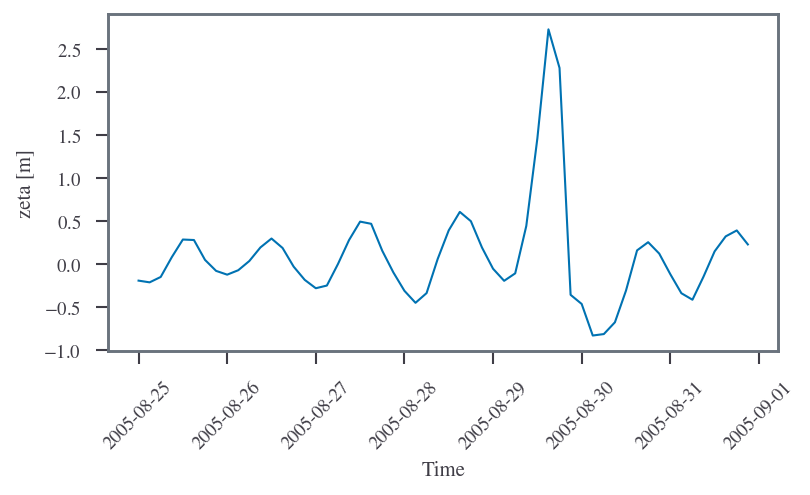

In [241]:
from sithom.plot import plot_defaults
plot_defaults()
plt.plot(cds_a["input_time"].values, output_array[:,0])
# need to rotate the x-axis labels
plt.xticks(rotation=45)
plt.xlabel("Time")
plt.ylabel("zeta [m]")

### Let's load the max data from artifacts as well (only need 1d param_array, and no interpolation)

In [254]:
from src.constants import NO_BBOX

def generate_max_parray_and_output(version=0):
    # load artifact dataset
    # maybe we can add a loop here to get all the artifacts with different versions
    artifact = run.use_artifact(f'sdat2/6d_individual_version2/output_dataset:v{version}', type='dataset')
    artifact_dir = artifact.download()
    cds_a = xr.open_dataset(os.path.join(artifact_dir, "combined_ds.nc"))

    # turn 7 parameters into array
    parray = cds_a[["angle", "speed", "point_east", "rmax", "pc", "vmax", "xn"]].to_array().values
    # value order is: angle, speed, point_east, rmax, pc, vmax, xn

    ### output array
    oa = cds_a[['zeta_max']]
    indices, = NO_BBOX.indices_inside(cds_a["lon"].values, cds_a["lat"].values)
    oa = oa.isel(node=indices)
    output_array = oa.to_array().values.transpose()
    
    return parray.reshape(1, -1), output_array

In [255]:
for i in range(200):
    print(i)
    parray, output_array = generate_max_parray_and_output(version=i)
    print(parray.shape, output_array.shape)

0


wandb: Downloading large artifact output_dataset:v0, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.0


(7,) (286, 1)
1


wandb: Downloading large artifact output_dataset:v1, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.3


(7,) (286, 1)
2


wandb: Downloading large artifact output_dataset:v2, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(7,) (286, 1)
3


wandb: Downloading large artifact output_dataset:v3, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.5


(7,) (286, 1)
4


wandb: Downloading large artifact output_dataset:v4, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.3


(7,) (286, 1)
5


wandb: Downloading large artifact output_dataset:v5, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:13.6


(7,) (286, 1)
6


wandb: Downloading large artifact output_dataset:v6, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.0


(7,) (286, 1)
7


wandb: Downloading large artifact output_dataset:v7, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.8


(7,) (286, 1)
8


wandb: Downloading large artifact output_dataset:v8, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:11.9


(7,) (286, 1)
9


wandb: Downloading large artifact output_dataset:v9, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.0


(7,) (286, 1)
10


In [249]:
parray.reshape(1, -1).shape

(1, 7)